In [49]:
### 1.1  一维数组与常用操作
import pandas as pd
import matplotlib.pyplot as plt

# 设置输出结果列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

In [50]:
# 自动创建从0开始的非负整数索引
s1 = pd.Series(range(1, 20, 5))
# 使用字典创建Series，使用字典的“键”作为索引
s2 = pd.Series({'语文':90, '数学': 92, 'Python': 98, '物理':87, '化学': 92})
# 修改指定索引对应的值
s1[3] = -17
s2['语文'] = 94

In [51]:
print('s1原始数据'.ljust(20, '='))
print(s1)

s1原始数据==============
0     1
1     6
2    11
3   -17
dtype: int64


In [52]:
print('对s1所有数据求绝对值'.ljust(20, '='))
print(abs(s1))

对s1所有数据求绝对值=========
0     1
1     6
2    11
3    17
dtype: int64


In [53]:
print('s1所有的值加5'.ljust(20, '='))
print(s1+5)

s1所有的值加5============
0     6
1    11
2    16
3   -12
dtype: int64


In [54]:
print('s1的每行索引前面加上数字2'.ljust(20, '='))
print(s1.add_prefix(2))

s1的每行索引前面加上数字2======
20     1
21     6
22    11
23   -17
dtype: int64


In [55]:
print('s2原始数据'.ljust(20, '='))
print(s2)

s2原始数据==============
语文      94
数学      92
Python    98
物理      87
化学      92
dtype: int64


s2数据的直方图============


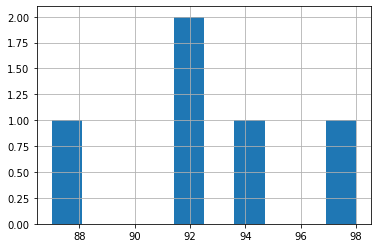

In [56]:
print('s2数据的直方图'.ljust(20,'='))
s2.hist()
plt.show()

In [57]:
print('s2的每行索引后面加上_张三'.ljust(20, '='))
print(s2.add_suffix('_张三'))

s2的每行索引后面加上_张三======
语文_张三      94
数学_张三      92
Python_张三    98
物理_张三      87
化学_张三      92
dtype: int64


In [58]:
print('s2最大值的索引'.ljust(20, '='))
print(s2.argmax())

s2最大值的索引============
2


In [59]:
print('测试s2的值是否在指定区间内'.ljust(20, '='))
print(s2.between(90, 94, inclusive=True))

测试s2的值是否在指定区间内======
语文       True
数学       True
Python    False
物理      False
化学       True
dtype: bool


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


In [60]:
print('查看s2中90分以上的数据'.ljust(20,'='))
print(s2[s2>90])

查看s2中90分以上的数据=======
语文      94
数学      92
Python    98
化学      92
dtype: int64


In [61]:
print('查看s2中大于中值的数据'.ljust(20,'='))
print(s2[s2>s2.median()])

查看s2中大于中值的数据========
语文      94
Python    98
dtype: int64


In [62]:
print('s2与数字之间的运算'.ljust(20, '='))
print(round((s2**0.5)*10, 1))

s2与数字之间的运算==========
语文      97.0
数学      95.9
Python    99.0
物理      93.3
化学      95.9
dtype: float64


In [63]:
print('s2的中值'.ljust(20, '='))
print(s2.median())

s2的中值===============
92.0


In [64]:
print('s2中最小的2个值'.ljust(20, '='))
print(s2.nsmallest(2))

s2中最小的2个值===========
物理    87
数学    92
dtype: int64


In [65]:
# 两个等长Series对象之间可以进行四则运算和幂运算
# 只对两个Series对象中都有的索引对应的值进行计算
# 非共同索引对应的值为控制NaN
print('两个Series对象相加'.ljust(20,'='))
print(pd.Series(range(5))+pd.Series(range(5,10)))

两个Series对象相加========
0     5
1     7
2     9
3    11
4    13
dtype: int64


In [66]:
# pipe()方法可以实现函数链式调用的功能
print('每个值的平方对5的余数'.ljust(20,'='))
print(pd.Series(range(5)).pipe(lambda x,y,z:(x**y)%z, 2, 5))

每个值的平方对5的余数=========
0    0
1    1
2    4
3    4
4    1
dtype: int64


In [67]:
print('每个值加3之后再乘以3'.ljust(20,'='))
print(pd.Series(range(5)).pipe(lambda x:x+3).pipe(lambda x:x*3))

每个值加3之后再乘以3=========
0     9
1    12
2    15
3    18
4    21
dtype: int64


In [68]:
# apply()方法用来对Series对象的值进行函数运算
print('每个值加3'.ljust(20,'='))
print(pd.Series(range(5)).apply(lambda x: x+3))

每个值加3===============
0    3
1    4
2    5
3    6
4    7
dtype: int64


In [69]:
print('标准差、无偏方差、无偏标准差'.ljust(20,'='))
print(pd.Series(range(5)).std())
print(pd.Series(range(5)).var())
print(pd.Series(range(5)).sem())

标准差、无偏方差、无偏标准差======
1.5811388300841898
2.5
0.7071067811865476


In [70]:
print('查看是否存在等价于True的值'.ljust(20,'='))
print(any(pd.Series([3,0,True])))

查看是否存在等价于True的值=====
True


In [71]:
print('查看是否所有值都等价于True'.ljust(20,'='))
print(all(pd.Series([3,0,True])))

查看是否所有值都等价于True=====
False


In [72]:
### 1.2  时间序列与常用操作
import pandas as pd

# start指定起始日期，end指定结束日期，periods指定产生的数据数量
# freq指定间隔，D表示天，W表示周，H表示小时
# M表示月末最后一天，MS表示月初第一天
# T表示分钟，Y表示年末最后一天，YS表示年初第一天
print('间隔5天'.ljust(30, '='))
print(pd.date_range(start='20190601', end='20190630', freq='5D'))

间隔5天==========================
DatetimeIndex(['2019-06-01', '2019-06-06', '2019-06-11', '2019-06-16',
               '2019-06-21', '2019-06-26'],
              dtype='datetime64[ns]', freq='5D')


In [73]:
print('间隔1周'.ljust(30, '='))
print(pd.date_range(start='20190601', end='20190630', freq='W'))

间隔1周==========================
DatetimeIndex(['2019-06-02', '2019-06-09', '2019-06-16', '2019-06-23',
               '2019-06-30'],
              dtype='datetime64[ns]', freq='W-SUN')


In [74]:
print('间隔2天，5个数据'.ljust(30, '='))
print(pd.date_range(start='20190601', periods=5, freq='2D'))

间隔2天，5个数据=====================
DatetimeIndex(['2019-06-01', '2019-06-03', '2019-06-05', '2019-06-07',
               '2019-06-09'],
              dtype='datetime64[ns]', freq='2D')


In [75]:
print('间隔3小时，8个数据'.ljust(30, '='))
print(pd.date_range(start='20190601', periods=8, freq='3H'))

间隔3小时，8个数据====================
DatetimeIndex(['2019-06-01 00:00:00', '2019-06-01 03:00:00',
               '2019-06-01 06:00:00', '2019-06-01 09:00:00',
               '2019-06-01 12:00:00', '2019-06-01 15:00:00',
               '2019-06-01 18:00:00', '2019-06-01 21:00:00'],
              dtype='datetime64[ns]', freq='3H')


In [76]:
print('3:00开始，间隔1分钟，12个数据'.ljust(30, '='))
print(pd.date_range(start='201906010300', periods=12, freq='T'))

3:00开始，间隔1分钟，12个数据============
DatetimeIndex(['2019-06-01 03:00:00', '2019-06-01 03:01:00',
               '2019-06-01 03:02:00', '2019-06-01 03:03:00',
               '2019-06-01 03:04:00', '2019-06-01 03:05:00',
               '2019-06-01 03:06:00', '2019-06-01 03:07:00',
               '2019-06-01 03:08:00', '2019-06-01 03:09:00',
               '2019-06-01 03:10:00', '2019-06-01 03:11:00'],
              dtype='datetime64[ns]', freq='T')


In [77]:
print('间隔1月，月末最后一天'.ljust(30, '='))
print(pd.date_range(start='20190101', end='20191231', freq='M'))

间隔1月，月末最后一天===================
DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='M')


In [78]:
print('间隔1年，6个数据，年末最后一天'.ljust(30, '='))
print(pd.date_range(start='20190101', periods=6, freq='A'))

间隔1年，6个数据，年末最后一天==============
DatetimeIndex(['2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31',
               '2023-12-31', '2024-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')


In [79]:
print('间隔1年，6个数据，年初第一天'.ljust(30, '='))
print(pd.date_range(start='20190101', periods=6, freq='AS'))

间隔1年，6个数据，年初第一天===============
DatetimeIndex(['2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01',
               '2023-01-01', '2024-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')


In [80]:
# 使用日期时间做索引，创建Series对象
data = pd.Series(index=pd.date_range(start='20190701', periods=24, freq='H'), data=range(24))
print('前5条数据'.ljust(30, '='))
print(data[:5])

前5条数据=========================
2019-07-01 00:00:00    0
2019-07-01 01:00:00    1
2019-07-01 02:00:00    2
2019-07-01 03:00:00    3
2019-07-01 04:00:00    4
Freq: H, dtype: int64


In [81]:
print('3分钟重采样，计算均值'.ljust(30, '='))
print(data.resample('3H').mean())

3分钟重采样，计算均值===================
2019-07-01 00:00:00     1.0
2019-07-01 03:00:00     4.0
2019-07-01 06:00:00     7.0
2019-07-01 09:00:00    10.0
2019-07-01 12:00:00    13.0
2019-07-01 15:00:00    16.0
2019-07-01 18:00:00    19.0
2019-07-01 21:00:00    22.0
Freq: 3H, dtype: float64


In [82]:
print('5小时重采样，求和'.ljust(30, '='))
print(data.resample('5H').sum())

5小时重采样，求和=====================
2019-07-01 00:00:00    10
2019-07-01 05:00:00    35
2019-07-01 10:00:00    60
2019-07-01 15:00:00    85
2019-07-01 20:00:00    86
Freq: 5H, dtype: int64


In [83]:
# OHLC分别表示OPEN、HIGH、LOW、CLOSE
print('5小时重采样，统计OHLC值'.ljust(30, '='))
print(data.resample('5H').ohlc())

5小时重采样，统计OHLC值================
                     open  high  low  close
2019-07-01 00:00:00     0     4    0      4
2019-07-01 05:00:00     5     9    5      9
2019-07-01 10:00:00    10    14   10     14
2019-07-01 15:00:00    15    19   15     19
2019-07-01 20:00:00    20    23   20     23


In [84]:
print('所有日期替换为第二天'.ljust(20,'='))
data.index = data.index + pd.Timedelta('1D')
print(data[:5])

所有日期替换为第二天==========
2019-07-02 00:00:00    0
2019-07-02 01:00:00    1
2019-07-02 02:00:00    2
2019-07-02 03:00:00    3
2019-07-02 04:00:00    4
Freq: H, dtype: int64


In [85]:
print('查看指定日期是周几'.ljust(20,'='))
print(pd.Timestamp('20190323').day_name())
print(pd.Timestamp('20190324').dayofweek)

查看指定日期是周几===========
Saturday
6


In [86]:
print('查看指定日期时间所在年是否闰年'.ljust(20,'='))
print(pd.Timestamp('201909300800').is_leap_year)

查看指定日期时间所在年是否闰年=====
False


In [87]:
print('查看指定日期所在的季度和月份'.ljust(20,'='))
day = pd.Timestamp('20191025')
print(day.quarter, day.month)

查看指定日期所在的季度和月份======
4 10


In [88]:
print('转换为Python的日期时间对象'.ljust(20,'='))
print(day.to_pydatetime())

转换为Python的日期时间对象====
2019-10-25 00:00:00


In [89]:
### 1.3  二维数组DataFrame
import numpy as np
import pandas as pd

# 设置输出结果列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

In [90]:
# 在[1,20]区间上生成5行3列15个随机数
# 使用index参数指定索引，columns参数指定每列标题
df = pd.DataFrame(np.random.randint(1, 20, (5,3)),
                  index=range(5),
                  columns=['A', 'B', 'C'])
print(df)

    A   B   C
0   5  18  19
1  10  18   1
2  14  17   2
3  18  14   9
4   2  13  19


In [91]:
print('='*20)
# 模拟2019年7月15日某超市熟食、化妆品、日用品每小时的销量
# 使用时间序列作为索引
df = pd.DataFrame(np.random.randint(5, 15, (13, 3)),
                  index=pd.date_range(start='201907150900',
                                      end='201907152100',
                                      freq='H'),
                  columns=['熟食', '化妆品', '日用品'])
print(df)

                     熟食  化妆品  日用品
2019-07-15 09:00:00    10      10      10
2019-07-15 10:00:00     8      12       7
2019-07-15 11:00:00    14       6       6
2019-07-15 12:00:00     9      10      11
2019-07-15 13:00:00     8       6      11
2019-07-15 14:00:00    10       7      11
2019-07-15 15:00:00     6      12      11
2019-07-15 16:00:00     8       7      10
2019-07-15 17:00:00     7      11       9
2019-07-15 18:00:00    13      14      14
2019-07-15 19:00:00     6       6      11
2019-07-15 20:00:00     7      13       8
2019-07-15 21:00:00    10      12       6


In [92]:
print('='*20)
# 模拟考试成绩，使用人名字符串做索引
df = pd.DataFrame({'语文':[87,79,67,92],
                   '数学':[93,89,80,77],
                   '英语':[90,80,70,75]},
                  index=['张三', '李四', '王五', '赵六'])
print(df)

      语文  数学  英语
张三    87    93    90
李四    79    89    80
王五    67    80    70
赵六    92    77    75


In [93]:
print('='*20)
# 自动对B列数据进行扩充，使其与A列数据一样多
df = pd.DataFrame({'A':range(5,10), 'B':3})
print(df)

   A  B
0  5  3
1  6  3
2  7  3
3  8  3
4  9  3


In [94]:
### 2.1  读取Excel文件中的数据
import pandas as pd

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

In [95]:
# 读取工号、姓名、时段、交易额这四列数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx',
                   usecols=['工号','姓名','时段','交易额'])

# 输出前10行数据
print(df[:10], end='\n\n')

   工号  姓名           时段  交易额
0  1001  张三   9：00-14：00  1664.0
1  1002  李四  14：00-21：00   954.0
2  1003  王五   9：00-14：00  1407.0
3  1004  赵六  14：00-21：00  1320.0
4  1005  周七   9：00-14：00   994.0
5  1006  钱八  14：00-21：00  1421.0
6  1006  钱八   9：00-14：00  1226.0
7  1001  张三  14：00-21：00  1442.0
8  1001  张三   9：00-14：00  1530.0
9  1002  李四  14：00-21：00  1395.0



In [96]:
# 读取第一个worksheet中所有列
# 跳过第1、3、5行，指定下标为1的列中数据为DataFrame的行索引标签
df = pd.read_excel(r'超市营业额2.xlsx',
                   skiprows=[1,3,5], index_col=1)
print(df[:10])

      工号        日期           时段  交易额      柜台
姓名                                                   
李四  1002  2019-03-01  14：00-21：00   954.0    化妆品
赵六  1004  2019-03-01  14：00-21：00  1320.0      食品
钱八  1006  2019-03-01  14：00-21：00  1421.0    日用品
钱八  1006  2019-03-01   9：00-14：00  1226.0  蔬菜水果
张三  1001  2019-03-01  14：00-21：00  1442.0  蔬菜水果
张三  1001  2019-03-02   9：00-14：00  1530.0    化妆品
李四  1002  2019-03-02  14：00-21：00  1395.0    化妆品
王五  1003  2019-03-02   9：00-14：00   936.0      食品
赵六  1004  2019-03-02  14：00-21：00   906.0      食品
周七  1005  2019-03-02   9：00-14：00  1444.0    日用品


In [97]:
### 2.2  筛选符合特定条件的数据
import pandas as pd

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

In [98]:
# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx')

print('下标在[5,10]区间的的行'.ljust(20, '='))
# 对行进行切片，注意切片是限定的左闭右开区间
print(df[5:11])

下标在[5,10]区间的的行======
    工号  姓名        日期           时段  交易额      柜台
5   1006  钱八  2019-03-01  14：00-21：00  1421.0    日用品
6   1006  钱八  2019-03-01   9：00-14：00  1226.0  蔬菜水果
7   1001  张三  2019-03-01  14：00-21：00  1442.0  蔬菜水果
8   1001  张三  2019-03-02   9：00-14：00  1530.0    化妆品
9   1002  李四  2019-03-02  14：00-21：00  1395.0    化妆品
10  1003  王五  2019-03-02   9：00-14：00   936.0      食品


In [99]:
# iloc使用数字做索引
print('索引为5的行'.ljust(20,'='))
print(df.iloc[5])

索引为5的行==============
工号               1006
姓名               钱八
日期         2019-03-01
时段      14：00-21：00
交易额           1421.0
柜台             日用品
Name: 5, dtype: object


In [100]:
print('下标为[3,5,10]的行'.ljust(20, '='))
print(df.iloc[[3,5,10],:])

下标为[3,5,10]的行=======
    工号  姓名        日期           时段  交易额    柜台
3   1004  赵六  2019-03-01  14：00-21：00  1320.0    食品
5   1006  钱八  2019-03-01  14：00-21：00  1421.0  日用品
10  1003  王五  2019-03-02   9：00-14：00   936.0    食品


In [101]:
print('行下标为[3,5,10]，列下标为[0,1,4]'.ljust(30, '='))
print(df.iloc[[3,5,10],[0,1,4]])

行下标为[3,5,10]，列下标为[0,1,4]======
    工号  姓名  交易额
3   1004  赵六  1320.0
5   1006  钱八  1421.0
10  1003  王五   936.0


In [102]:
print('查看指定的列前5行数据'.ljust(20,'='))
print(df[['姓名', '时段', '交易额']][:5])

查看指定的列前5行数据=========
   姓名           时段  交易额
0  张三   9：00-14：00  1664.0
1  李四  14：00-21：00   954.0
2  王五   9：00-14：00  1407.0
3  赵六  14：00-21：00  1320.0
4  周七   9：00-14：00   994.0


In [103]:
print('只查看前10行指定的列'.ljust(20, '='))
print(df[:10][['姓名', '日期', '柜台']])

只查看前10行指定的列=========
   姓名        日期      柜台
0  张三  2019-03-01    化妆品
1  李四  2019-03-01    化妆品
2  王五  2019-03-01      食品
3  赵六  2019-03-01      食品
4  周七  2019-03-01    日用品
5  钱八  2019-03-01    日用品
6  钱八  2019-03-01  蔬菜水果
7  张三  2019-03-01  蔬菜水果
8  张三  2019-03-02    化妆品
9  李四  2019-03-02    化妆品


In [104]:
print('下标为[3,5,10]的行的指定列'.ljust(20, '='))
# loc和at使用标签文本做索引
print(df.loc[[3,5,10], ['姓名','交易额']])

下标为[3,5,10]的行的指定列===
    姓名  交易额
3   赵六  1320.0
5   钱八  1421.0
10  王五   936.0


In [105]:
print('行下标为3,姓名列的值'.ljust(20,'='))
print(df.at[3, '姓名'])

行下标为3,姓名列的值=========
赵六


In [106]:
print('交易额高于1700元的数据'.ljust(20, '='))
print(df[df['交易额']>1700])

交易额高于1700元的数据=======
     工号  姓名        日期           时段   交易额      柜台
18   1003  王五  2019-03-03   9：00-14：00   1713.0      食品
47   1005  周七  2019-03-06  14：00-21：00   1778.0  蔬菜水果
48   1003  王五  2019-03-07   9：00-14：00   1713.0    化妆品
82   1006  钱八  2019-03-11   9：00-14：00   1737.0      食品
105  1001  张三  2019-03-14   9：00-14：00  12100.0    日用品
113  1002  李四  2019-03-15   9：00-14：00   1798.0    日用品
121  1002  李四  2019-03-16   9：00-14：00   1788.0    日用品
136  1001  张三  2019-03-17  14：00-21：00   1791.0      食品
185  1004  赵六  2019-03-24   9：00-14：00   1775.0    化妆品
188  1002  李四  2019-03-24  14：00-21：00   1793.0  蔬菜水果
205  1001  张三  2019-03-26   9：00-14：00   1746.0    日用品
223  1003  王五  2019-03-28   9：00-14：00   9031.0      食品
227  1005  周七  2019-03-29   9：00-14：00   1737.0  蔬菜水果
246  1004  赵六  2019-03-31  14：00-21：00   1722.0    日用品


In [107]:
print('交易总额'.ljust(20, '='))
print(df['交易额'].sum())

交易总额================
327257.0


In [108]:
print('下午班的交易总额'.ljust(20, '='))
print(df[df['时段']=='14：00-21：00']['交易额'].sum())

下午班的交易总额============
151228.0


In [109]:
print('张三下午班的交易情况'.ljust(20,'='))
print(df[(df.姓名=='张三')&(df.时段=='14：00-21：00')][:10])

张三下午班的交易情况==========
     工号  姓名        日期           时段  交易额      柜台
7    1001  张三  2019-03-01  14：00-21：00  1442.0  蔬菜水果
39   1001  张三  2019-03-05  14：00-21：00   856.0  蔬菜水果
73   1001  张三  2019-03-10  14：00-21：00  1040.0    化妆品
91   1001  张三  2019-03-12  14：00-21：00  1435.0      食品
99   1001  张三  2019-03-13  14：00-21：00  1333.0      食品
112  1001  张三  2019-03-14  14：00-21：00  1261.0  蔬菜水果
120  1001  张三  2019-03-15  14：00-21：00  1035.0  蔬菜水果
128  1001  张三  2019-03-16  14：00-21：00  1408.0  蔬菜水果
136  1001  张三  2019-03-17  14：00-21：00  1791.0      食品
144  1001  张三  2019-03-18  14：00-21：00  1378.0      食品


In [110]:
print('日用品柜台销售总额'.ljust(20, '='))
print(df[df['柜台']=='日用品']['交易额'].sum())

日用品柜台销售总额===========
88162.0


In [111]:
print('张三和李四二人销售总额'.ljust(20, '='))
print(df[df['姓名'].isin(['张三','李四'])]['交易额'].sum())

张三和李四二人销售总额=========
116860.0


In [112]:
print('交易额在指定范围内的记录'.ljust(20, '='))
print(df[df['交易额'].between(800,850)])

交易额在指定范围内的记录========
     工号  姓名        日期           时段  交易额      柜台
41   1002  李四  2019-03-06  14：00-21：00   822.0    化妆品
55   1002  李四  2019-03-07  14：00-21：00   831.0  蔬菜水果
59   1004  赵六  2019-03-08  14：00-21：00   825.0      食品
86   1003  王五  2019-03-11   9：00-14：00   801.0  蔬菜水果
94   1003  王五  2019-03-12   9：00-14：00   831.0  蔬菜水果
106  1002  李四  2019-03-14  14：00-21：00   822.0    日用品
129  1002  李四  2019-03-17   9：00-14：00   828.0    日用品
132  1006  钱八  2019-03-17  14：00-21：00   840.0  蔬菜水果
137  1002  李四  2019-03-18   9：00-14：00   824.0    化妆品
147  1003  王五  2019-03-19   9：00-14：00   846.0  蔬菜水果
152  1001  张三  2019-03-19  14：00-21：00   844.0      食品
160  1001  张三  2019-03-20  14：00-21：00   829.0      食品
163  1006  钱八  2019-03-21   9：00-14：00   807.0  蔬菜水果
233  1001  张三  2019-03-30  14：00-21：00   850.0    化妆品
248  1006  钱八  2019-03-31  14：00-21：00   812.0      食品


In [113]:
### 2.3  查看数据特征和统计信息
import pandas as pd

# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx')

In [114]:
print('查看交易额统计信息'.ljust(20, '='))
print(df['交易额'].describe())

查看交易额统计信息===========
count      246.000000
mean      1330.313008
std        904.300720
min         53.000000
25%       1031.250000
50%       1259.000000
75%       1523.000000
max      12100.000000
Name: 交易额, dtype: float64


In [115]:
print('交易额四分位数'.ljust(20, '='))
print(df['交易额'].quantile([0, 0.25, 0.5, 0.75, 1.0]))

交易额四分位数=============
0.00       53.00
0.25     1031.25
0.50     1259.00
0.75     1523.00
1.00    12100.00
Name: 交易额, dtype: float64


In [116]:
print('交易额中值'.ljust(20, '='))
print(df['交易额'].median())

交易额中值===============
1259.0


In [117]:
print('交易额最小的三条记录'.ljust(20, '='))
print(df.nsmallest(3, '交易额'))

交易额最小的三条记录==========
     工号  姓名        日期           时段  交易额    柜台
76   1005  周七  2019-03-10   9：00-14：00    53.0  日用品
97   1002  李四  2019-03-13  14：00-21：00    98.0  日用品
194  1001  张三  2019-03-25  14：00-21：00   114.0  化妆品


In [118]:
print('交易额最大的5条记录'.ljust(20, '='))
print(df.nlargest(5, '交易额'))

交易额最大的5条记录==========
     工号  姓名        日期           时段   交易额      柜台
105  1001  张三  2019-03-14   9：00-14：00  12100.0    日用品
223  1003  王五  2019-03-28   9：00-14：00   9031.0      食品
113  1002  李四  2019-03-15   9：00-14：00   1798.0    日用品
188  1002  李四  2019-03-24  14：00-21：00   1793.0  蔬菜水果
136  1001  张三  2019-03-17  14：00-21：00   1791.0      食品


In [119]:
print('最后一个日期'.ljust(20, '='))
print(df['日期'].max())

最后一个日期==============
2019-03-31


In [120]:
print('最小的工号'.ljust(20, '='))
print(df['工号'].min())

最小的工号===============
1001


In [121]:
print('第一个最小交易额的行下标'.ljust(20,'='))
index = df['交易额'].idxmin()
print(index)
print('第一个最小交易额'.ljust(20,'='))
print(df.loc[index,'交易额'])

第一个最小交易额的行下标========
76
第一个最小交易额============
53.0


In [122]:
print('第一个最大交易额的行下标'.ljust(20,'='))
index = df['交易额'].idxmax()
print(index)
print('第一个最大交易额'.ljust(20,'='))
print(df.loc[index,'交易额'])

第一个最大交易额的行下标========
105
第一个最大交易额============
12100.0


In [123]:
### 2.4  按不同标准对数据排序
import pandas as pd

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

In [124]:
# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx')

In [125]:
print('按交易额和工号降序排序'.ljust(20, '='))
print(df.sort_values(by=['交易额','工号'], ascending=False)[:12])

按交易额和工号降序排序=========
     工号  姓名        日期           时段   交易额      柜台
105  1001  张三  2019-03-14   9：00-14：00  12100.0    日用品
223  1003  王五  2019-03-28   9：00-14：00   9031.0      食品
113  1002  李四  2019-03-15   9：00-14：00   1798.0    日用品
188  1002  李四  2019-03-24  14：00-21：00   1793.0  蔬菜水果
136  1001  张三  2019-03-17  14：00-21：00   1791.0      食品
121  1002  李四  2019-03-16   9：00-14：00   1788.0    日用品
47   1005  周七  2019-03-06  14：00-21：00   1778.0  蔬菜水果
185  1004  赵六  2019-03-24   9：00-14：00   1775.0    化妆品
205  1001  张三  2019-03-26   9：00-14：00   1746.0    日用品
82   1006  钱八  2019-03-11   9：00-14：00   1737.0      食品
227  1005  周七  2019-03-29   9：00-14：00   1737.0  蔬菜水果
246  1004  赵六  2019-03-31  14：00-21：00   1722.0    日用品


In [126]:
print('按交易额降序、工号升序排序'.ljust(20, '='))
print(df.sort_values(by=['交易额','工号'], ascending=[False,True])[:12])

按交易额降序、工号升序排序=======
     工号  姓名        日期           时段   交易额      柜台
105  1001  张三  2019-03-14   9：00-14：00  12100.0    日用品
223  1003  王五  2019-03-28   9：00-14：00   9031.0      食品
113  1002  李四  2019-03-15   9：00-14：00   1798.0    日用品
188  1002  李四  2019-03-24  14：00-21：00   1793.0  蔬菜水果
136  1001  张三  2019-03-17  14：00-21：00   1791.0      食品
121  1002  李四  2019-03-16   9：00-14：00   1788.0    日用品
47   1005  周七  2019-03-06  14：00-21：00   1778.0  蔬菜水果
185  1004  赵六  2019-03-24   9：00-14：00   1775.0    化妆品
205  1001  张三  2019-03-26   9：00-14：00   1746.0    日用品
227  1005  周七  2019-03-29   9：00-14：00   1737.0  蔬菜水果
82   1006  钱八  2019-03-11   9：00-14：00   1737.0      食品
246  1004  赵六  2019-03-31  14：00-21：00   1722.0    日用品


In [127]:
print('按工号升序排序'.ljust(20, '='))
print(df.sort_values(by='工号', na_position='last')[:10])

按工号升序排序=============
     工号  姓名        日期           时段  交易额      柜台
0    1001  张三  2019-03-01   9：00-14：00  1664.0    化妆品
178  1001  张三  2019-03-23  14：00-21：00  1271.0    化妆品
39   1001  张三  2019-03-05  14：00-21：00   856.0  蔬菜水果
40   1001  张三  2019-03-06   9：00-14：00  1037.0    化妆品
177  1001  张三  2019-03-23   9：00-14：00  1296.0    化妆品
169  1001  张三  2019-03-22   9：00-14：00   946.0    化妆品
160  1001  张三  2019-03-20  14：00-21：00   829.0      食品
54   1001  张三  2019-03-07   9：00-14：00  1263.0  蔬菜水果
157  1001  张三  2019-03-20   9：00-14：00  1037.0    日用品
225  1001  张三  2019-03-29  14：00-21：00  1523.0    化妆品


In [128]:
print('按列名升序排序'.ljust(20, '='))
# 注意，这里是按汉字的Unicode编码排序
print(df.sort_index(axis=1, ascending=True)[:10])

按列名升序排序=============
   交易额  姓名  工号        日期           时段      柜台
0  1664.0  张三  1001  2019-03-01   9：00-14：00    化妆品
1   954.0  李四  1002  2019-03-01  14：00-21：00    化妆品
2  1407.0  王五  1003  2019-03-01   9：00-14：00      食品
3  1320.0  赵六  1004  2019-03-01  14：00-21：00      食品
4   994.0  周七  1005  2019-03-01   9：00-14：00    日用品
5  1421.0  钱八  1006  2019-03-01  14：00-21：00    日用品
6  1226.0  钱八  1006  2019-03-01   9：00-14：00  蔬菜水果
7  1442.0  张三  1001  2019-03-01  14：00-21：00  蔬菜水果
8  1530.0  张三  1001  2019-03-02   9：00-14：00    化妆品
9  1395.0  李四  1002  2019-03-02  14：00-21：00    化妆品


In [129]:
### 2.5  使用分组与聚合对员工业绩进行汇总
import pandas as pd
import numpy as np

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

In [130]:
# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx')

print('根据lambda表达式对index处理后的结果分组'.ljust(30,'='))
print(df.groupby(by=lambda num: num%5)['交易额'].sum())

根据lambda表达式对index处理后的结果分组=====
0    72823.0
1    64877.0
2    62382.0
3    71094.0
4    56081.0
Name: 交易额, dtype: float64


In [131]:
# 根据指定字典的“键”对index进行分组，“值”作为index标签
print('指定by参数为字典'.ljust(30,'='))
print(df.groupby(by={7:'下标为7的行', 35:'下标为35的行'})['交易额'].sum())

指定by参数为字典=====================
下标为35的行     974.0
下标为7的行     1442.0
Name: 交易额, dtype: float64


In [132]:
print('不同时段的销售总额'.ljust(30,'='))
print(df.groupby(by='时段')['交易额'].sum())

不同时段的销售总额=====================
时段
14：00-21：00    151228.0
9：00-14：00     176029.0
Name: 交易额, dtype: float64


In [133]:
print('各柜台的销售总额'.ljust(30,'='))
print(df.groupby(by='柜台')['交易额'].sum())

各柜台的销售总额======================
柜台
化妆品      75389.0
日用品      88162.0
蔬菜水果    78532.0
食品        85174.0
Name: 交易额, dtype: float64


In [134]:
# 可以查看每个员工上班总时长是否均匀
print('每个员工上班的次数'.ljust(30,'='))
dff = df.groupby(by='姓名')['日期'].count()
dff.name = '上班次数'
print(dff)

每个员工上班的次数=====================
姓名
周七    42
张三    38
李四    47
王五    40
赵六    45
钱八    37
Name: 上班次数, dtype: int64


In [135]:
print('每个员工交易额平均值'.ljust(30,'='))
print(df.groupby(by='姓名')[ '交易额'].mean().round(2).sort_values())

每个员工交易额平均值====================
姓名
周七    1195.45
赵六    1245.98
李四    1249.57
钱八    1322.72
王五    1472.30
张三    1529.74
Name: 交易额, dtype: float64


In [136]:
print('汇总交易额转换为整数'.ljust(30,'='))
print(df.groupby(by='姓名').sum()['交易额'].apply(int))

汇总交易额转换为整数====================
姓名
周七    47818
张三    58130
李四    58730
王五    58892
赵六    56069
钱八    47618
Name: 交易额, dtype: int64


In [137]:
print('每个员工交易额的中值'.ljust(30,'='))
dff = df.groupby(by='姓名').median()
print(dff['交易额'])

每个员工交易额的中值====================
姓名
周七    1134.5
张三    1290.0
李四    1276.0
王五    1227.0
赵六    1224.0
钱八    1381.0
Name: 交易额, dtype: float64


In [138]:
dff['排名'] = dff['交易额'].rank(ascending=False)
print('每个员工交易额中值的排名'.ljust(30,'='))
print(dff[['交易额','排名']])

每个员工交易额中值的排名==================
      交易额  排名
姓名              
周七  1134.5   6.0
张三  1290.0   2.0
李四  1276.0   3.0
王五  1227.0   4.0
赵六  1224.0   5.0
钱八  1381.0   1.0


In [139]:
print('每个员工不同时段的交易额'.ljust(30,'='))
print(df.groupby(by=['姓名','时段'])['交易额'].sum())

每个员工不同时段的交易额==================
姓名  时段       
周七  14：00-21：00    15910.0
      9：00-14：00     31908.0
张三  14：00-21：00    23659.0
      9：00-14：00     34471.0
李四  14：00-21：00    32295.0
      9：00-14：00     26435.0
王五  14：00-21：00    17089.0
      9：00-14：00     41803.0
赵六  14：00-21：00    29121.0
      9：00-14：00     26948.0
钱八  14：00-21：00    33154.0
      9：00-14：00     14464.0
Name: 交易额, dtype: float64


In [140]:
# 对不同的列可以采用不同的函数
print('时段和交易额采用不同的聚合方式'.ljust(30,'='))
print(df.groupby(by=['姓名'])['时段', '交易额'].aggregate({'交易额':np.sum, '时段':lambda x:'各时段累计'}))

时段和交易额采用不同的聚合方式===============
       交易额        时段
姓名                     
周七  47818.0  各时段累计
张三  58130.0  各时段累计
李四  58730.0  各时段累计
王五  58892.0  各时段累计
赵六  56069.0  各时段累计
钱八  47618.0  各时段累计


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [141]:
# 对不同的列可以采用不同的函数
print('时段和交易额采用不同的聚合方式'.ljust(30,'='))
print(df.groupby(by=['姓名'])[['时段', '交易额']].aggregate({'交易额':np.sum, '时段':lambda x:'各时段累计'}))

时段和交易额采用不同的聚合方式===============
       交易额        时段
姓名                     
周七  47818.0  各时段累计
张三  58130.0  各时段累计
李四  58730.0  各时段累计
王五  58892.0  各时段累计
赵六  56069.0  各时段累计
钱八  47618.0  各时段累计


In [142]:
# 使用DataFrame结构的agg()方法对指定列进行聚合
print('使用agg()方法对交易额进行聚合'.ljust(30,'='))
print(df.agg({'交易额':['sum','mean','min','max','median'], '日期':['min','max']}))

使用agg()方法对交易额进行聚合=============
               交易额        日期
sum     327257.000000         NaN
mean      1330.313008         NaN
min         53.000000  2019-03-01
max      12100.000000  2019-03-31
median    1259.000000         NaN


In [143]:
print('对分组结果进行聚合'.ljust(30,'='))
print(df.groupby(by='姓名').agg(['max','min','mean','median']))

对分组结果进行聚合=====================
      工号                         交易额                            
       max   min    mean  median      max    min         mean  median
姓名                                                                 
周七  1005  1005  1005.0  1005.0   1778.0   53.0  1195.450000  1134.5
张三  1001  1001  1001.0  1001.0  12100.0  114.0  1529.736842  1290.0
李四  1002  1002  1002.0  1002.0   1798.0   98.0  1249.574468  1276.0
王五  1003  1003  1003.0  1003.0   9031.0  801.0  1472.300000  1227.0
赵六  1004  1004  1004.0  1004.0   1775.0  825.0  1245.977778  1224.0
钱八  1006  1006  1006.0  1006.0   1737.0  807.0  1322.722222  1381.0


In [144]:
print('查看分组聚合后的部分结果'.ljust(30,'='))
print(df.groupby(by='姓名').agg(['max','min', 'mean','median'])['交易额'])

查看分组聚合后的部分结果==================
          max    min         mean  median
姓名                                     
周七   1778.0   53.0  1195.450000  1134.5
张三  12100.0  114.0  1529.736842  1290.0
李四   1798.0   98.0  1249.574468  1276.0
王五   9031.0  801.0  1472.300000  1227.0
赵六   1775.0  825.0  1245.977778  1224.0
钱八   1737.0  807.0  1322.722222  1381.0


In [145]:
### 2.6  处理超市交易数据中的异常值
import pandas as pd

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

In [146]:
# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx')

print('查看交易额低于200的数据'.ljust(20,'='))
print(df[df.交易额<200])

查看交易额低于200的数据=======
     工号  姓名        日期           时段  交易额    柜台
76   1005  周七  2019-03-10   9：00-14：00    53.0  日用品
97   1002  李四  2019-03-13  14：00-21：00    98.0  日用品
194  1001  张三  2019-03-25  14：00-21：00   114.0  化妆品


In [147]:
df.loc[df.交易额<200, '交易额'] = df[df.交易额<200]['交易额'].map(lambda num: num*1.5)
print('上浮50%之后仍低于200的数据'.ljust(20,'='))
print(df[df.交易额<200])

上浮50%之后仍低于200的数据====
     工号  姓名        日期           时段  交易额    柜台
76   1005  周七  2019-03-10   9：00-14：00    79.5  日用品
97   1002  李四  2019-03-13  14：00-21：00   147.0  日用品
194  1001  张三  2019-03-25  14：00-21：00   171.0  化妆品


In [148]:
print('查看交易额高于3000的数据'.ljust(20,'='))
print(df[df['交易额']>3000])

查看交易额高于3000的数据======
     工号  姓名        日期          时段   交易额    柜台
105  1001  张三  2019-03-14  9：00-14：00  12100.0  日用品
223  1003  王五  2019-03-28  9：00-14：00   9031.0    食品


In [149]:
print('交易额低于200或高于3000的数据'.ljust(20,'='))
print(df[(df.交易额<200) | (df.交易额>3000)])

交易额低于200或高于3000的数据==
     工号  姓名        日期           时段   交易额    柜台
76   1005  周七  2019-03-10   9：00-14：00     79.5  日用品
97   1002  李四  2019-03-13  14：00-21：00    147.0  日用品
105  1001  张三  2019-03-14   9：00-14：00  12100.0  日用品
194  1001  张三  2019-03-25  14：00-21：00    171.0  化妆品
223  1003  王五  2019-03-28   9：00-14：00   9031.0    食品


In [150]:
# 把低于200的交易额都替换为固定的200
df.loc[df.交易额<200, '交易额'] = 200
print('交易额低于200或高于3000的数据'.ljust(20,'='))
print(df[(df.交易额<200) | (df.交易额>3000)])

交易额低于200或高于3000的数据==
     工号  姓名        日期          时段   交易额    柜台
105  1001  张三  2019-03-14  9：00-14：00  12100.0  日用品
223  1003  王五  2019-03-28  9：00-14：00   9031.0    食品


In [151]:
# 把高于3000的交易额都替换为固定的3000
df.loc[df.交易额>3000, '交易额'] = 3000
print('交易额低于200或高于3000的数量'.ljust(20,'='))
print(df[(df.交易额<200) | (df.交易额>3000)]['交易额'].count())

交易额低于200或高于3000的数量==
0


In [152]:
### 2.7  处理超市交易数据中的缺失值
from copy import deepcopy
import pandas as pd

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

In [153]:
# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx')

print('数据总行数'.ljust(20,'='))
print(len(df))

数据总行数===============
249


In [154]:
print('丢弃缺失值之后的行数'.ljust(20,'='))
print(len(df.dropna()))

丢弃缺失值之后的行数==========
246


In [155]:
print('包含缺失值的行'.ljust(20,'='))
print(df[df['交易额'].isnull()])

包含缺失值的行=============
     工号  姓名        日期           时段  交易额    柜台
110  1005  周七  2019-03-14  14：00-21：00     NaN  化妆品
124  1006  钱八  2019-03-16  14：00-21：00     NaN    食品
168  1005  周七  2019-03-21  14：00-21：00     NaN    食品


In [156]:
print('使用固定值替换缺失值'.ljust(20,'='))
# 深复制，不影响原来的df
dff = deepcopy(df)
dff.loc[dff.交易额.isnull(),'交易额'] = 1000
print(dff.iloc[[110,124,168],:])

使用固定值替换缺失值==========
     工号  姓名        日期           时段  交易额    柜台
110  1005  周七  2019-03-14  14：00-21：00  1000.0  化妆品
124  1006  钱八  2019-03-16  14：00-21：00  1000.0    食品
168  1005  周七  2019-03-21  14：00-21：00  1000.0    食品


In [157]:
print('使用每人交易额均值替换缺失值'.ljust(20,'='))
dff = deepcopy(df)
for i in dff[dff.交易额.isnull()].index:
    dff.loc[i, '交易额'] = round(dff.loc[dff.姓名==dff.loc[i,'姓名'], '交易额'].mean())
print(dff.iloc[[110,124,168],:])

使用每人交易额均值替换缺失值======
     工号  姓名        日期           时段  交易额    柜台
110  1005  周七  2019-03-14  14：00-21：00  1195.0  化妆品
124  1006  钱八  2019-03-16  14：00-21：00  1323.0    食品
168  1005  周七  2019-03-21  14：00-21：00  1195.0    食品


In [158]:
print('使用整体均值的80%填充缺失值'.ljust(20,'='))
df.fillna({'交易额': round(df['交易额'].mean()*0.8)}, inplace=True)
print(df.iloc[[110,124,168],:])

使用整体均值的80%填充缺失值=====
     工号  姓名        日期           时段  交易额    柜台
110  1005  周七  2019-03-14  14：00-21：00  1064.0  化妆品
124  1006  钱八  2019-03-16  14：00-21：00  1064.0    食品
168  1005  周七  2019-03-21  14：00-21：00  1064.0    食品


In [159]:
### 2.8  处理超市交易数据中的重复值
from copy import deepcopy
import pandas as pd
import numpy as np

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

In [160]:
# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx')

print('数据总行数'.ljust(20,'='))
print(len(df))

数据总行数===============
249


In [161]:
print('重复行'.ljust(20,'='))
print(df[df.duplicated()])

重复行=================
     工号  姓名        日期           时段  交易额      柜台
104  1006  钱八  2019-03-13  14：00-21：00  1609.0  蔬菜水果


In [162]:
print('一人同时负责两个柜台的排班'.ljust(20,'='))
dff = df[['工号','姓名','日期','时段']]
dff = dff[dff.duplicated()]
for row in dff.values:
    print(df[(df.工号==row[0])&(df.日期==row[2])&(df.时段==row[3])])

# 直接丢弃重复行
df = df.drop_duplicates()
print('有效数据总行数'.ljust(20,'='))
print(len(df))

一人同时负责两个柜台的排班=======
    工号  姓名        日期           时段  交易额      柜台
49  1002  李四  2019-03-07  14：00-21：00  1199.0    化妆品
55  1002  李四  2019-03-07  14：00-21：00   831.0  蔬菜水果
     工号  姓名        日期           时段  交易额      柜台
103  1006  钱八  2019-03-13  14：00-21：00  1609.0  蔬菜水果
104  1006  钱八  2019-03-13  14：00-21：00  1609.0  蔬菜水果
     工号  姓名        日期          时段  交易额      柜台
171  1006  钱八  2019-03-22  9：00-14：00  1555.0  蔬菜水果
175  1006  钱八  2019-03-22  9：00-14：00  1503.0      食品
     工号  姓名        日期          时段  交易额    柜台
201  1004  赵六  2019-03-26  9：00-14：00  1599.0  化妆品
210  1004  赵六  2019-03-26  9：00-14：00  1257.0  化妆品
有效数据总行数=============
248


In [163]:
# 可以查看是否有录入错误的工号和姓名
print('所有工号与姓名的对应关系'.ljust(20,'='))
dff = df[['工号','姓名']]
print(dff.drop_duplicates())

所有工号与姓名的对应关系========
   工号  姓名
0  1001  张三
1  1002  李四
2  1003  王五
3  1004  赵六
4  1005  周七
5  1006  钱八


In [164]:
### 2.9  使用数据差分查看员工业绩波动情况
import pandas as pd

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx')

print('每天交易总额变化情况'.ljust(20,'='))
dff = df.groupby(by='日期').sum()['交易额'].diff()
# 格式化，整数前面带加号
print(dff.map(lambda num:'%+.2f'%num)[:5])

每天交易总额变化情况==========
日期
2019-03-01       +nan
2019-03-02    -248.00
2019-03-03    +924.00
2019-03-04     +56.00
2019-03-05    -277.00
Name: 交易额, dtype: object


In [165]:
print('张三的每天交易总额变化情况'.ljust(20,'='))
print(df[df.姓名=='张三'].groupby(by='日期').sum()['交易额'].diff()[:5])

张三的每天交易总额变化情况=======
日期
2019-03-01       NaN
2019-03-02   -1576.0
2019-03-03    -169.0
2019-03-04    -145.0
2019-03-05    1031.0
Name: 交易额, dtype: float64


In [166]:
### 2.10  使用透视表与交叉表查看业绩汇总数据
#（1）透视表
import pandas as pd

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx')

print('查看每人每天交易总额'.ljust(20,'='))
dff = df.groupby(by=['姓名','日期'], as_index=False).sum()
# 数据量太大，为减少篇幅占用，只输出前5天的数据
dff = dff.pivot(index='姓名', columns='日期', values='交易额')
print(dff.iloc[:,:5])

查看每人每天交易总额==========
日期  2019-03-01  2019-03-02  2019-03-03  2019-03-04  2019-03-05
姓名                                                            
周七       994.0      1444.0      3230.0      2545.0      1249.0
张三      3106.0      1530.0      1361.0      1216.0      2247.0
李四       954.0      3044.0      1034.0      2734.0      3148.0
王五      1407.0      2115.0      1713.0      1590.0      1687.0
赵六      1320.0       906.0      2309.0      1673.0       974.0
钱八      2647.0      1141.0      1457.0      1402.0      1578.0


In [167]:
print('交易总额低于5万元的员工前5天业绩'.ljust(20,'='))
print(dff[dff.sum(axis=1)<50000].iloc[:,:5])

交易总额低于5万元的员工前5天业绩===
日期  2019-03-01  2019-03-02  2019-03-03  2019-03-04  2019-03-05
姓名                                                            
周七       994.0      1444.0      3230.0      2545.0      1249.0
钱八      2647.0      1141.0      1457.0      1402.0      1578.0


In [168]:
print('交易总额低于5万元的员工姓名'.ljust(20,'='))
print(dff[dff.sum(axis=1)<50000].index.values)

交易总额低于5万元的员工姓名======
['周七' '钱八']


In [169]:
print('使用pivot_table()方法实现'.ljust(20,'='))
# 如果把只显示前5列的限制去掉，会发现最后还有一个名字为ALL的列
print(df.pivot_table(values='交易额', index='姓名', columns='日期', aggfunc='sum',margins=True).iloc[:,:5])

使用pivot_table()方法实现=
日期  2019-03-01  2019-03-02  2019-03-03  2019-03-04  2019-03-05
姓名                                                            
周七       994.0      1444.0      3230.0      2545.0      1249.0
张三      3106.0      1530.0      1361.0      1216.0      2247.0
李四       954.0      3044.0      1034.0      2734.0      3148.0
王五      1407.0      2115.0      1713.0      1590.0      1687.0
赵六      1320.0       906.0      2309.0      1673.0       974.0
钱八      2647.0      1141.0      1457.0      1402.0      1578.0
All      10428.0     10180.0     11104.0     11160.0     10883.0


In [170]:
print('查看每人在各柜台的交易总额'.ljust(20,'='))
dff = df.groupby(by=['姓名','柜台'], as_index=False).sum()
print(dff.pivot(index='姓名', columns='柜台', values='交易额'))

查看每人在各柜台的交易总额=======
柜台   化妆品   日用品  蔬菜水果     食品
姓名                                     
周七   9516.0  12863.0   16443.0   8996.0
张三  22975.0  18629.0    7265.0   9261.0
李四  20467.0  10104.0   23263.0   4896.0
王五  10112.0  11357.0   10473.0  26950.0
赵六  12319.0  23286.0    2527.0  17937.0
钱八      NaN  11923.0   18561.0  17134.0


In [171]:
print('查看每人每天的上班次数'.ljust(20,'='))
print(df.pivot_table(values='交易额', index='姓名', columns='日期', aggfunc='count',margins=True).iloc[:,:5])

查看每人每天的上班次数=========
日期  2019-03-01  2019-03-02  2019-03-03  2019-03-04  2019-03-05
姓名                                                            
周七         1.0         1.0         2.0         2.0         1.0
张三         2.0         1.0         1.0         1.0         2.0
李四         1.0         2.0         1.0         2.0         2.0
王五         1.0         2.0         1.0         1.0         1.0
赵六         1.0         1.0         2.0         1.0         1.0
钱八         2.0         1.0         1.0         1.0         1.0
All          8.0         8.0         8.0         8.0         8.0


In [172]:
print('查看每人在各柜台的上班次数'.ljust(20,'='))
print(df.pivot_table(values='交易额', index='姓名', columns='柜台', aggfunc='count',margins=True))

查看每人在各柜台的上班次数=======
柜台  化妆品  日用品  蔬菜水果  食品  All
姓名                                     
周七     8.0    11.0      14.0   7.0   40
张三    19.0     6.0       6.0   7.0   38
李四    16.0     9.0      18.0   4.0   47
王五     8.0     9.0       9.0  14.0   40
赵六    10.0    18.0       2.0  15.0   45
钱八     NaN     9.0      14.0  13.0   36
All     61.0    62.0      63.0  60.0  246


In [173]:
### 2.10  使用透视表与交叉表查看业绩汇总数据
#（2）交叉表
import pandas as pd

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx')

print('每人每天的上班次数'.ljust(20,'='))
print(pd.crosstab(df.姓名, df.日期, margins=True).iloc[:,:5])

每人每天的上班次数===========
日期  2019-03-01  2019-03-02  2019-03-03  2019-03-04  2019-03-05
姓名                                                            
周七           1           1           2           2           1
张三           2           1           1           1           2
李四           1           2           1           2           2
王五           1           2           1           1           1
赵六           1           1           2           1           1
钱八           2           1           1           1           1
All            8           8           8           8           8


In [174]:
print('每人在各柜台上班总次数'.ljust(20,'='))
print(pd.crosstab(df.姓名, df.柜台))

每人在各柜台上班总次数=========
柜台  化妆品  日用品  蔬菜水果  食品
姓名                                
周七       9      11        14     8
张三      19       6         6     7
李四      16       9        18     4
王五       8       9         9    14
赵六      10      18         2    15
钱八       0       9        14    14


In [175]:
print('每人在各柜台交易总额'.ljust(20,'='))
print(pd.crosstab(df.姓名, df.柜台, df.交易额, aggfunc='sum'))

print('每人在各柜台交易额平均值'.ljust(20,'='))
print(pd.crosstab(df.姓名, df.柜台, df.交易额, aggfunc='mean').apply(lambda num: round(num,2)))

每人在各柜台交易总额==========
柜台   化妆品   日用品  蔬菜水果     食品
姓名                                     
周七   9516.0  12863.0   16443.0   8996.0
张三  22975.0  18629.0    7265.0   9261.0
李四  20467.0  10104.0   23263.0   4896.0
王五  10112.0  11357.0   10473.0  26950.0
赵六  12319.0  23286.0    2527.0  17937.0
钱八      NaN  11923.0   18561.0  17134.0
每人在各柜台交易额平均值========
柜台   化妆品   日用品  蔬菜水果     食品
姓名                                     
周七  1189.50  1169.36   1174.50  1285.14
张三  1209.21  3104.83   1210.83  1323.00
李四  1279.19  1122.67   1292.39  1224.00
王五  1264.00  1261.89   1163.67  1925.00
赵六  1231.90  1293.67   1263.50  1195.80
钱八      NaN  1324.78   1325.79  1318.00


In [176]:
### 2.11  使用重采样技术按时间段查看员工业绩
import numpy as np
import pandas as pd

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx')
df.日期 = pd.to_datetime(df.日期)

print('每7天营业总额'.ljust(20,'='))
print(df.resample('7D', on='日期').sum()['交易额'])

每7天营业总额=============
日期
2019-03-01    73600.0
2019-03-08    77823.0
2019-03-15    65996.0
2019-03-22    79046.0
2019-03-29    30792.0
Freq: 7D, Name: 交易额, dtype: float64


In [177]:
print('每7天营业总额'.ljust(20,'='))
print(df.resample('7D', on='日期',
                    label='right').sum()['交易额'])

每7天营业总额=============
日期
2019-03-08    73600.0
2019-03-15    77823.0
2019-03-22    65996.0
2019-03-29    79046.0
2019-04-05    30792.0
Freq: 7D, Name: 交易额, dtype: float64


In [178]:
print('每7天营业额平均值'.ljust(20,'='))
func = lambda num:round(num,2)
print(df.resample('7D', on='日期',
                    label='right').mean().apply(func)['交易额'])

每7天营业额平均值===========
日期
2019-03-08    1314.29
2019-03-15    1389.70
2019-03-22    1222.15
2019-03-29    1411.54
2019-04-05    1283.00
Freq: 7D, Name: 交易额, dtype: float64


In [179]:
print('每7天营业额平均值'.ljust(20,'='))
# 注意，这里要用np.sum()，不能用内置函数sum()
# 因为内置函数sum()不能忽略缺失值
func = lambda item:round(np.sum(item)/len(item),2)
print(df.resample('7D', on='日期',label='right').apply(func)['交易额'])

每7天营业额平均值===========


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1137: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  result[i] = colg.aggregate(func, *args, **kwargs)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
print(df.resample('7D', on='日期',label='right')['交易额'].apply(func))

日期
2019-03-08    1314.29
2019-03-15    1365.32
2019-03-22    1178.50
2019-03-29    1411.54
2019-04-05    1283.00
Freq: 7D, Name: 交易额, dtype: float64


In [ ]:
### 2.12  多索引相关技术与操作
import pandas as pd

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx')
# 删除工号一列的数据
df.drop('工号', axis=1, inplace=True)
df = df.groupby(by=['姓名', '柜台']).sum()
print('按姓名和柜台进行分组汇总'.ljust(20,'='))
print(df[:10])

按姓名和柜台进行分组汇总========
                交易额
姓名 柜台             
周七 化妆品     9516.0
     日用品    12863.0
     蔬菜水果  16443.0
     食品       8996.0
张三 化妆品    22975.0
     日用品    18629.0
     蔬菜水果   7265.0
     食品       9261.0
李四 化妆品    20467.0
     日用品    10104.0


In [ ]:
print('查看周七的汇总数据'.ljust(20,'='))
print(df.loc['周七',:])

查看周七的汇总数据===========
           交易额
柜台             
化妆品     9516.0
日用品    12863.0
蔬菜水果  16443.0
食品       8996.0


In [ ]:
print('查看周七在化妆品柜台的交易数据'.ljust(20,'='))
print(df.loc[('周七', '化妆品')])

# 重新读取数据，指定多个索引
df = pd.read_excel(r'超市营业额2.xlsx', index_col=[1, 5])

# 丢弃“工号”列
df.drop('工号', axis=1, inplace=True)

# 按索引“柜台”排序，查看前12行
dff = df.sort_index(level='柜台', axis=0)
print('按柜台排序，查看前12行'.ljust(20,'='))
print(dff[:12])

查看周七在化妆品柜台的交易数据=====
交易额    9516.0
Name: (周七, 化妆品), dtype: float64
按柜台排序，查看前12行========
                   日期           时段  交易额
姓名 柜台                                     
周七 化妆品  2019-03-11   9：00-14：00   859.0
     化妆品  2019-03-11  14：00-21：00  1633.0
     化妆品  2019-03-12   9：00-14：00  1302.0
     化妆品  2019-03-12  14：00-21：00  1317.0
     化妆品  2019-03-13  14：00-21：00   922.0
     化妆品  2019-03-14  14：00-21：00     NaN
     化妆品  2019-03-15  14：00-21：00   916.0
     化妆品  2019-03-16  14：00-21：00  1246.0
     化妆品  2019-03-31  14：00-21：00  1321.0
张三 化妆品  2019-03-01   9：00-14：00  1664.0
     化妆品  2019-03-02   9：00-14：00  1530.0
     化妆品  2019-03-03   9：00-14：00  1361.0


In [ ]:
# 按索引“姓名”排序，查看前12行
dff = df.sort_index(level='姓名', axis=0)
print('按姓名排序，查看前12行'.ljust(20,'='))
print(dff[:12])

按姓名排序，查看前12行========
                   日期           时段  交易额
姓名 柜台                                     
周七 化妆品  2019-03-11   9：00-14：00   859.0
     化妆品  2019-03-11  14：00-21：00  1633.0
     化妆品  2019-03-12   9：00-14：00  1302.0
     化妆品  2019-03-12  14：00-21：00  1317.0
     化妆品  2019-03-13  14：00-21：00   922.0
     化妆品  2019-03-14  14：00-21：00     NaN
     化妆品  2019-03-15  14：00-21：00   916.0
     化妆品  2019-03-16  14：00-21：00  1246.0
     化妆品  2019-03-31  14：00-21：00  1321.0
     日用品  2019-03-01   9：00-14：00   994.0
     日用品  2019-03-02   9：00-14：00  1444.0
     日用品  2019-03-03   9：00-14：00  1592.0


In [ ]:
# 按索引“柜台”分组求和
print('按柜台分组求和'.ljust(20,'='))
dfff = dff.groupby(level='柜台').sum()
dfff.columns = ['交易额总和']
print(dfff)

按柜台分组求和=============
          交易额总和
柜台                
化妆品       75389.0
日用品       88162.0
蔬菜水果     78532.0
食品         85174.0


In [ ]:
# 按索引“姓名”分组求中值
print('按姓名分组求中值'.ljust(20,'='))
dfff = dff.groupby(level='姓名').median()
dfff.columns = ['交易额中值']
print(dfff)

按姓名分组求中值============
      交易额中值
姓名            
周七      1134.5
张三      1290.0
李四      1276.0
王五      1227.0
赵六      1224.0
钱八      1381.0


In [ ]:
### 2.13  使用标准差与协方差分析员工业绩
###演示数据
import pandas as pd

df = pd.DataFrame({'A':[3,3,3,3,3], 'B':[1,2,3,4,5],'C':[-5,-4,15,4,5], 'D':[-50,-40,15,40,50]})
print('原始数据'.ljust(20,'='))
print(df)

原始数据================
   A  B   C   D
0  3  1  -5 -50
1  3  2  -4 -40
2  3  3  15  15
3  3  4   4  40
4  3  5   5  50


In [ ]:
print('平均值'.ljust(20,'='))
print(df.mean())

平均值=================
A    3.0
B    3.0
C    3.0
D    3.0
dtype: float64


In [ ]:
print('标准差'.ljust(20,'='))
print(df.std())

标准差=================
A     0.000000
B     1.581139
C     8.093207
D    45.771170
dtype: float64


In [ ]:
print('标准差的平方'.ljust(20,'='))
print(df.std()**2)

标准差的平方==============
A       0.0
B       2.5
C      65.5
D    2095.0
dtype: float64


In [ ]:
print('协方差'.ljust(20,'='))
print(df.cov())


###使用标准差和协方差分析不同柜台的业绩
# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx',
                     usecols=['姓名','日期','时段','柜台','交易额'])

# 丢弃缺失值和重复值
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# 处理异常值
df.loc[df.交易额<200, '交易额'] = 200
df.loc[df.交易额>3000, '交易额'] = 3000

# 使用交叉表得到不同员工在不同柜台的交易额平均值
dff = pd.crosstab(df.姓名, df.柜台, df.交易额, aggfunc='mean')

print('标准差'.ljust(20,'='))
print(dff.std())

协方差=================
     A     B      C       D
A  0.0   0.0    0.0     0.0
B  0.0   2.5    7.0    70.0
C  0.0   7.0   65.5   250.0
D  0.0  70.0  250.0  2095.0
标准差=================
柜台
化妆品       36.480497
日用品      159.008839
蔬菜水果     60.331171
食品        105.031231
dtype: float64


In [ ]:
print('协方差'.ljust(20,'='))
print(dff.cov())

协方差=================
柜台           化妆品        日用品     蔬菜水果          食品
柜台                                                          
化妆品    1330.826697  -2296.460562   923.019793    692.300017
日用品   -2296.460562  25283.810853 -1030.111953   2957.850772
蔬菜水果   923.019793  -1030.111953  3639.850206  -3918.549524
食品       692.300017   2957.850772 -3918.549524  11031.559490


In [ ]:
### 2.14  使用pandas的属性接口实现高级功能
import copy
import pandas as pd

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx', usecols=['日期', '交易额'])

# 深复制，不影响原来的df
dff = copy.deepcopy(df)
# 把日期列替换为周几
dff['日期'] = pd.to_datetime(df['日期']).dt.day_name()
# 按周几分组，查看交易额平均值，四舍五入
print('按周几分组查看交易额平均值'.ljust(20,'='))
dff = dff.groupby('日期').mean().apply(round)
dff.index.name = '周几'
print(dff)

按周几分组查看交易额平均值=======
           交易额
周几             
Friday     1277.0
Monday     1233.0
Saturday   1306.0
Sunday     1254.0
Thursday   1830.0
Tuesday    1258.0
Wednesday  1224.0


In [ ]:
dff = copy.deepcopy(df)
# 修改日期列，只保留年份和月份
dff['日期'] = dff['日期'].str.extract(r'(\d{4}-\d{2})')
print('只查看年份和月份'.ljust(20,'='))
print(dff[:5])

只查看年份和月份============
      日期  交易额
0  2019-03  1664.0
1  2019-03   954.0
2  2019-03  1407.0
3  2019-03  1320.0
4  2019-03   994.0


In [ ]:
# 按字符串形式的日期最后一位数进行分组
# 该月1、11、21、31日汇总为一组，2、12、22日为一组，以此类推
print('按日期的日进行分组查看交易额平均值'.ljust(20,'='))
print(df.groupby(df['日期'].str.__getitem__(-1)).mean().apply(round))

按日期的日进行分组查看交易额平均值===
      交易额
日期        
0     1178.0
1     1264.0
2     1273.0
3     1317.0
4     1801.0
5     1223.0
6     1292.0
7     1216.0
8     1508.0
9     1266.0


In [ ]:
# 查看日期尾数为6的数据前12行
print('查看日期尾数为6的数据'.ljust(20,'='))
print(df[df['日期'].str.endswith('6')][:12])

查看日期尾数为6的数据=========
           日期  交易额
40   2019-03-06  1037.0
41   2019-03-06   822.0
42   2019-03-06  1200.0
43   2019-03-06  1245.0
44   2019-03-06  1699.0
45   2019-03-06  1199.0
46   2019-03-06  1162.0
47   2019-03-06  1778.0
121  2019-03-16  1788.0
122  2019-03-16  1590.0
123  2019-03-16  1498.0
124  2019-03-16     NaN


In [ ]:
# 查看日期尾数为12的数据
# slice()接收3个参数，分别为起始位置、结束位置和步长
print('日期尾数为12的交易数据'.ljust(20,'='))
print(df[df.日期.str.slice(-2)=='12'])

日期尾数为12的交易数据========
          日期  交易额
88  2019-03-12  1183.0
89  2019-03-12   979.0
90  2019-03-12  1651.0
91  2019-03-12  1435.0
92  2019-03-12  1302.0
93  2019-03-12  1317.0
94  2019-03-12   831.0
95  2019-03-12  1530.0


In [ ]:
# 日期中月份或天数包含2的交易数据第15到25行
print('日期中月份或天数包含2的交易数据'.ljust(20,'='))
print(df[df.日期.str.slice(-5).str.contains('2')][15:25])

日期中月份或天数包含2的交易数据====
           日期  交易额
95   2019-03-12  1530.0
153  2019-03-20  1332.0
154  2019-03-20  1485.0
155  2019-03-20   980.0
156  2019-03-20  1615.0
157  2019-03-20  1037.0
158  2019-03-20  1649.0
159  2019-03-20  1046.0
160  2019-03-20   829.0
161  2019-03-21  1528.0


In [ ]:
### 2.15  绘制各员工在不同柜台业绩平均值的柱状图
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 读取全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx')

# 修改异常值
df.loc[df.交易额>3000, '交易额'] = 3000
df.loc[df.交易额<200, '交易额'] = 200

# 删除重复值
df.drop_duplicates(inplace=True)

# 填充缺失值
df['交易额'].fillna(df['交易额'].mean(), inplace=True)



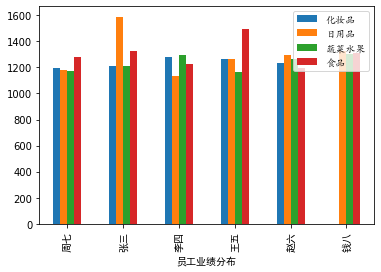

In [ ]:
# 使用交叉表得到每人在各柜台交易额平均值
print(''.ljust(20,'='))
df_group = pd.crosstab(df.姓名, df.柜台, df.交易额, aggfunc='mean').apply(round)# 绘制柱状图，默认使用index作为横坐标
df_group.plot(kind='bar')

font = fm.FontProperties(fname=r'C:\Windows\Fonts\STKAITI.ttf')
plt.xlabel('员工业绩分布', fontproperties='simhei')
plt.xticks(fontproperties='simhei')
plt.legend(prop=font)

# 显示绘制结果
plt.show()

In [ ]:
### 2.17  数据拆分与合并
#（1）concat()函数与append()方法
import pandas as pd

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# 读取Sheet1中全部数据，使用默认索引
df = pd.read_excel(r'超市营业额2.xlsx')
# 读取Sheet2中全部数据，使用默认索引
df5 = pd.read_excel(r'超市营业额2.xlsx',
                      sheet_name='Sheet2')

# 按行进行拆分
df1 = df[:3]
df2 = df[50:53]
# 按行进行合并，要求多个DataFrame结构相同
df3 = pd.concat([df1,df2,df5])
# 使用append()方法按行合并，忽略原来的索引
df4 = df1.append([df2,df5], ignore_index=True)
# 按列进行拆分
df6 = df.loc[:, ['姓名','柜台','交易额']]

print(df1, df2, df3, df4, df6[:5], sep='\n\n')

   工号  姓名        日期           时段  交易额    柜台
0  1001  张三  2019-03-01   9：00-14：00  1664.0  化妆品
1  1002  李四  2019-03-01  14：00-21：00   954.0  化妆品
2  1003  王五  2019-03-01   9：00-14：00  1407.0    食品

    工号  姓名        日期           时段  交易额    柜台
50  1004  赵六  2019-03-07   9：00-14：00  1340.0    食品
51  1004  赵六  2019-03-07  14：00-21：00   942.0    食品
52  1005  周七  2019-03-07   9：00-14：00  1465.0  日用品

    工号  姓名        日期           时段  交易额      柜台
0   1001  张三  2019-03-01   9：00-14：00  1664.0    化妆品
1   1002  李四  2019-03-01  14：00-21：00   954.0    化妆品
2   1003  王五  2019-03-01   9：00-14：00  1407.0      食品
50  1004  赵六  2019-03-07   9：00-14：00  1340.0      食品
51  1004  赵六  2019-03-07  14：00-21：00   942.0      食品
52  1005  周七  2019-03-07   9：00-14：00  1465.0    日用品
0   1001  张三  2019-04-01   9：00-14：00  1367.0    化妆品
1   1002  李四  2019-04-01  14：00-21：00  1005.0    化妆品
2   1003  王五  2019-04-01   9：00-14：00  1460.0      食品
3   1004  赵六  2019-04-01  14：00-21：00  1270.0      食品
4   1005  周七  2019-04

In [ ]:
### 2.17  数据拆分与合并
#（2）merge()方法与join()方法
import numpy as np
import pandas as pd

# 设置列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# 读取Sheet1中全部数据，使用默认索引
df1 = pd.read_excel(r'超市营业额2.xlsx')
# 读取Sheet3中全部数据，使用默认索引
df2 = pd.read_excel(r'超市营业额2.xlsx', sheet_name='Sheet3')

In [ ]:
# 按同名的列合并，随机查看10行数据
rows = np.random.randint(0, len(df1), 10)
print(pd.merge(df1, df2).iloc[rows,:], end='\n\n')

     工号  姓名        日期           时段  交易额      柜台  职级
185  1005  周七  2019-03-11  14：00-21：00  1633.0    化妆品  员工
235  1006  钱八  2019-03-21   9：00-14：00   807.0  蔬菜水果  员工
109  1003  王五  2019-03-19   9：00-14：00   846.0  蔬菜水果  组长
138  1004  赵六  2019-03-10   9：00-14：00  1061.0      食品  员工
11   1001  张三  2019-03-12   9：00-14：00  1651.0      食品  店长
124  1003  王五  2019-03-31   9：00-14：00  1274.0      食品  组长
60   1002  李四  2019-03-16  14：00-21：00  1590.0    日用品  主管
6    1001  张三  2019-03-05  14：00-21：00   856.0  蔬菜水果  店长
14   1001  张三  2019-03-13  14：00-21：00  1333.0      食品  店长
211  1005  周七  2019-03-31   9：00-14：00  1044.0  蔬菜水果  员工



In [ ]:
# 按工号合并，指定其他同名列的后缀
print(pd.merge(df1, df2, on='工号', suffixes=['_x','_y']).iloc[rows,:], end='\n\n')

     工号 姓名_x        日期           时段  交易额      柜台 姓名_y  职级
185  1005   周七  2019-03-11  14：00-21：00  1633.0    化妆品   周七  员工
235  1006   钱八  2019-03-21   9：00-14：00   807.0  蔬菜水果   钱八  员工
109  1003   王五  2019-03-19   9：00-14：00   846.0  蔬菜水果   王五  组长
138  1004   赵六  2019-03-10   9：00-14：00  1061.0      食品   赵六  员工
11   1001   张三  2019-03-12   9：00-14：00  1651.0      食品   张三  店长
124  1003   王五  2019-03-31   9：00-14：00  1274.0      食品   王五  组长
60   1002   李四  2019-03-16  14：00-21：00  1590.0    日用品   李四  主管
6    1001   张三  2019-03-05  14：00-21：00   856.0  蔬菜水果   张三  店长
14   1001   张三  2019-03-13  14：00-21：00  1333.0      食品   张三  店长
211  1005   周七  2019-03-31   9：00-14：00  1044.0  蔬菜水果   周七  员工



In [ ]:
# 两个表都设置工号列为索引
print(df1.set_index('工号').join(df2.set_index('工号'), lsuffix='_x', rsuffix='_y').iloc[rows,:])


     姓名_x        日期           时段  交易额      柜台 姓名_y  职级
工号                                                                 
1005   周七  2019-03-11  14：00-21：00  1633.0    化妆品   周七  员工
1006   钱八  2019-03-21   9：00-14：00   807.0  蔬菜水果   钱八  员工
1003   王五  2019-03-19   9：00-14：00   846.0  蔬菜水果   王五  组长
1004   赵六  2019-03-10   9：00-14：00  1061.0      食品   赵六  员工
1001   张三  2019-03-12   9：00-14：00  1651.0      食品   张三  店长
1003   王五  2019-03-31   9：00-14：00  1274.0      食品   王五  组长
1002   李四  2019-03-16  14：00-21：00  1590.0    日用品   李四  主管
1001   张三  2019-03-05  14：00-21：00   856.0  蔬菜水果   张三  店长
1001   张三  2019-03-13  14：00-21：00  1333.0      食品   张三  店长
1005   周七  2019-03-31   9：00-14：00  1044.0  蔬菜水果   周七  员工
